In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [6]:
# Load data
lefse = pd.read_csv('./P11_TI_HOMO_WT/lefse_de_output.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
lefse = lefse.assign(abs_LDAscore=abs(lefse['LDAscore']))
lefse = lefse.sort_values(by='abs_LDAscore', ascending=False).head(15)
# Define the condition to filter the data (e.g., Category == 'X')
lefse_sorted = lefse
lefse_sorted

,Feature,Pvalues,FDR,Sig_Homo,Sig_WT,LDAscore,abs_LDAscore
3,Muribacter,0.036170,0.71436,1318800.00,2103900.0,-5.59,5.59
0,Kurthia,0.012694,0.45087,697.41,7191.1,-3.51,3.51
2,Bacillus,0.017122,0.45087,1859.80,4587.4,-3.14,3.14
1,Flectobacillus,0.015985,0.45087,464.94,2479.7,-3.00,3.00


In [7]:
# Specify the columns to consider for finding the max
columns_to_check = ['Sig_Homo', 'Sig_WT']
# Find the column with the maximum value for each row
lefse_sorted ['Response'] = lefse_sorted [columns_to_check].idxmax(axis=1)
lefse_sorted 

,Feature,Pvalues,FDR,Sig_Homo,Sig_WT,LDAscore,abs_LDAscore,Response
3,Muribacter,0.036170,0.71436,1318800.00,2103900.0,-5.59,5.59,Sig_WT
0,Kurthia,0.012694,0.45087,697.41,7191.1,-3.51,3.51,Sig_WT
2,Bacillus,0.017122,0.45087,1859.80,4587.4,-3.14,3.14,Sig_WT
1,Flectobacillus,0.015985,0.45087,464.94,2479.7,-3.00,3.00,Sig_WT


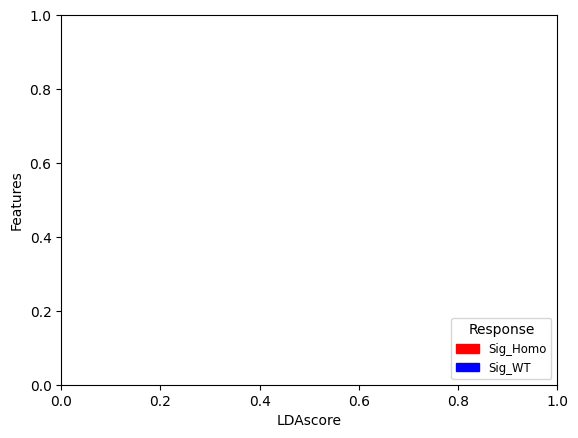

In [12]:
lefse_sorted = lefse_sorted.sort_values(by='LDAscore', ascending=True)
colors = lefse_sorted ['Response'].map({'Sig_Homo': 'red','Sig_WT': 'blue'})
# plt.figure(figsize=(8, 6))  # Adjust the figure size to fit the rotated chart
# plt.barh(lefse_sorted ['Feature'], lefse_sorted ['LDAscore'], color=colors)  # Swap x and y
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore')
plt.ylabel('Features')

# Create a legend for 'Category' colors
red_patch = mpatches.Patch(color='red', label='Sig_Homo')
# blue_patch = mpatches.Patch(color='green', label='P11')
green_patch = mpatches.Patch(color='blue', label='Sig_WT')
# orange_patch = mpatches.Patch(color='purple', label='P28')
plt.legend(handles=[red_patch,green_patch  ], title='Response', loc='lower right',fontsize='small')